# Assignment 2 - Neural Networks for Classification

## Part 1 - Implementing a Neural Network with One Hidden Layer

#### Loading data and libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from keras_visualizer import visualizer
import tensorflow as tf
import pandas as pd
import seaborn as sns

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz2.38/bin/'

In [2]:
# import diabetes dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)


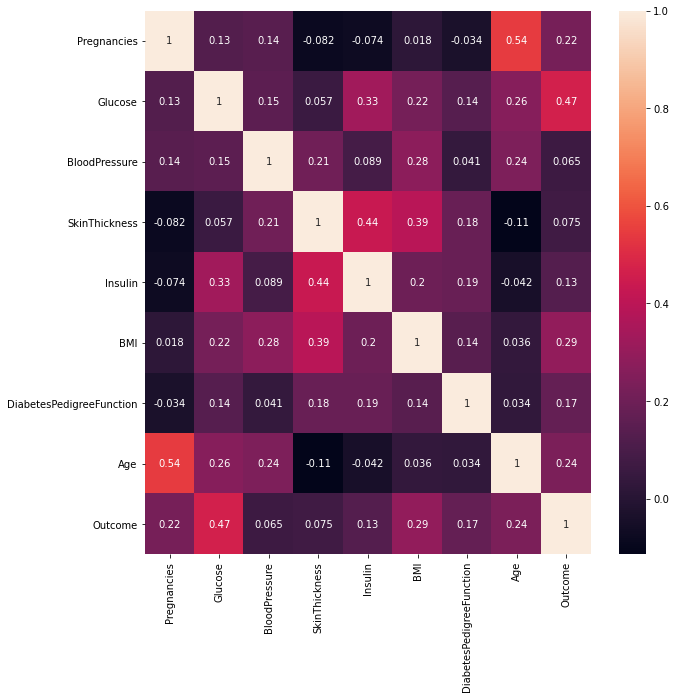

In [3]:
#Correlation Matrix - feature dependecy
corrMatrix = diabetes_df.corr()

# code for display
print(diabetes_df.shape)
plt.figure(figsize=(10,10))
corrMatrix = diabetes_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### Splitting Data to Train and Test 

In [4]:
X = diabetes_df.iloc[:, :-1].values
Y = diabetes_df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

In [5]:
# Number of rows in train and test data split

print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [6]:
# Normalization


#### 1. Creating the model

In [7]:
# Neural Network with One Hidden Layer.

# Creating the model.
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu', kernel_initializer='he_uniform'))  # Hidden layer.
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))  # Output layer.
visualizer(model, format='png', view=True)

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

# Training the model.
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test), epochs=20, batch_size=10)

# Evaluating the model
loss, accuracy = model.evaluate(X_test, Y_test)
print('\n\n Loss', loss, 'Accuracy:', accuracy)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
62/62 [==============================] - 0s 4ms/step - loss: 13.0346 - accuracy: 0.6238 - val_loss: 1.0807 - val_accuracy: 0.6623
Epoch 2/20
62/62 [==============================] - 0s 2ms/step - loss: 0.8167 - accuracy: 0.6596 - val_loss: 1.1114 - val_accuracy: 0.6364
Epoch 3/20
62/62 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.6726 - val_loss: 0.7233 - val_accuracy: 0.6039
Epoch 4/20
62/62 [==============================] - 0s 2ms/step - loss: 0.6329 - accuracy: 0.6

#### 2. Plot the accuracy and loss

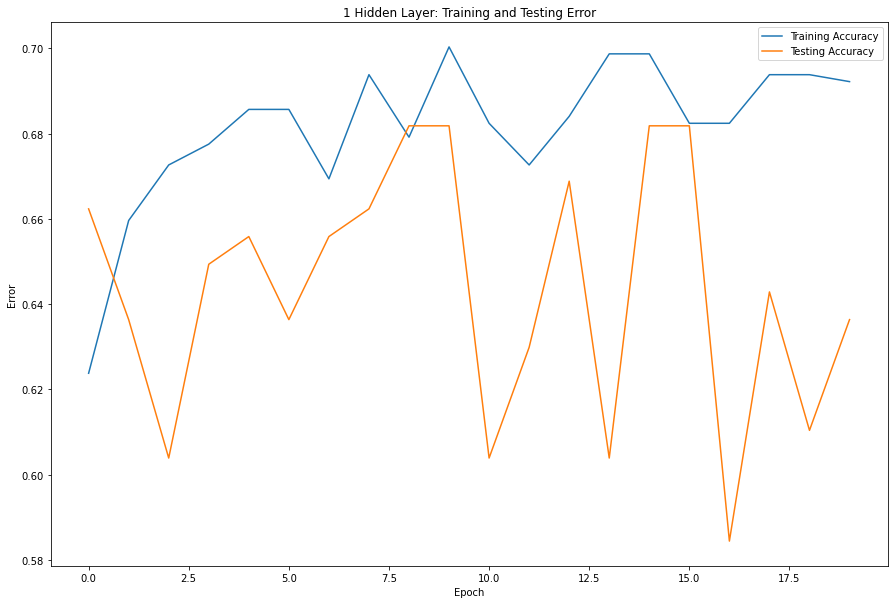

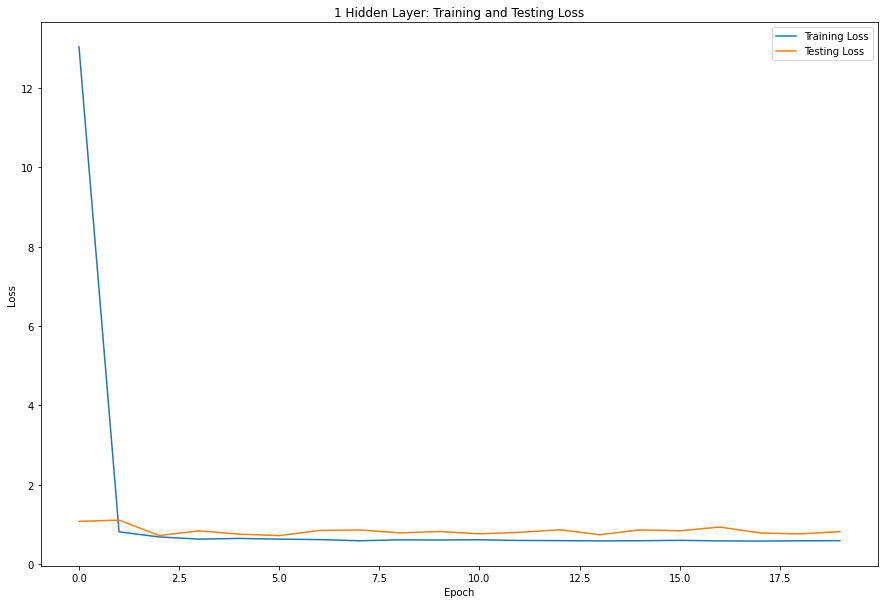

In [8]:
# Plot the accuracy and loss.

# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('1 Hidden Layer: Training and Testing Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('1 Hidden Layer: Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()